#  Importing Modules and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error , classification_report , confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\STAR TOP\\.vscode\\ML_elevvo_intership\\Task_3 Forest Cover Type Classification\\covtype.csv")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.shape

(581012, 55)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [5]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
data.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

# Data Preprocessing

In [7]:
data["Cover_Type"]=data.Cover_Type.astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Elevation                           581012 non-null  int64   
 1   Aspect                              581012 non-null  int64   
 2   Slope                               581012 non-null  int64   
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64   
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64   
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64   
 6   Hillshade_9am                       581012 non-null  int64   
 7   Hillshade_Noon                      581012 non-null  int64   
 8   Hillshade_3pm                       581012 non-null  int64   
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64   
 10  Wilderness_Area1                    581012 non-null  int64   
 11  Wilderness_Ar

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


WE Can see we not Have Any Duplicated or Null Value in Data 

# Exploratory Data Analysis

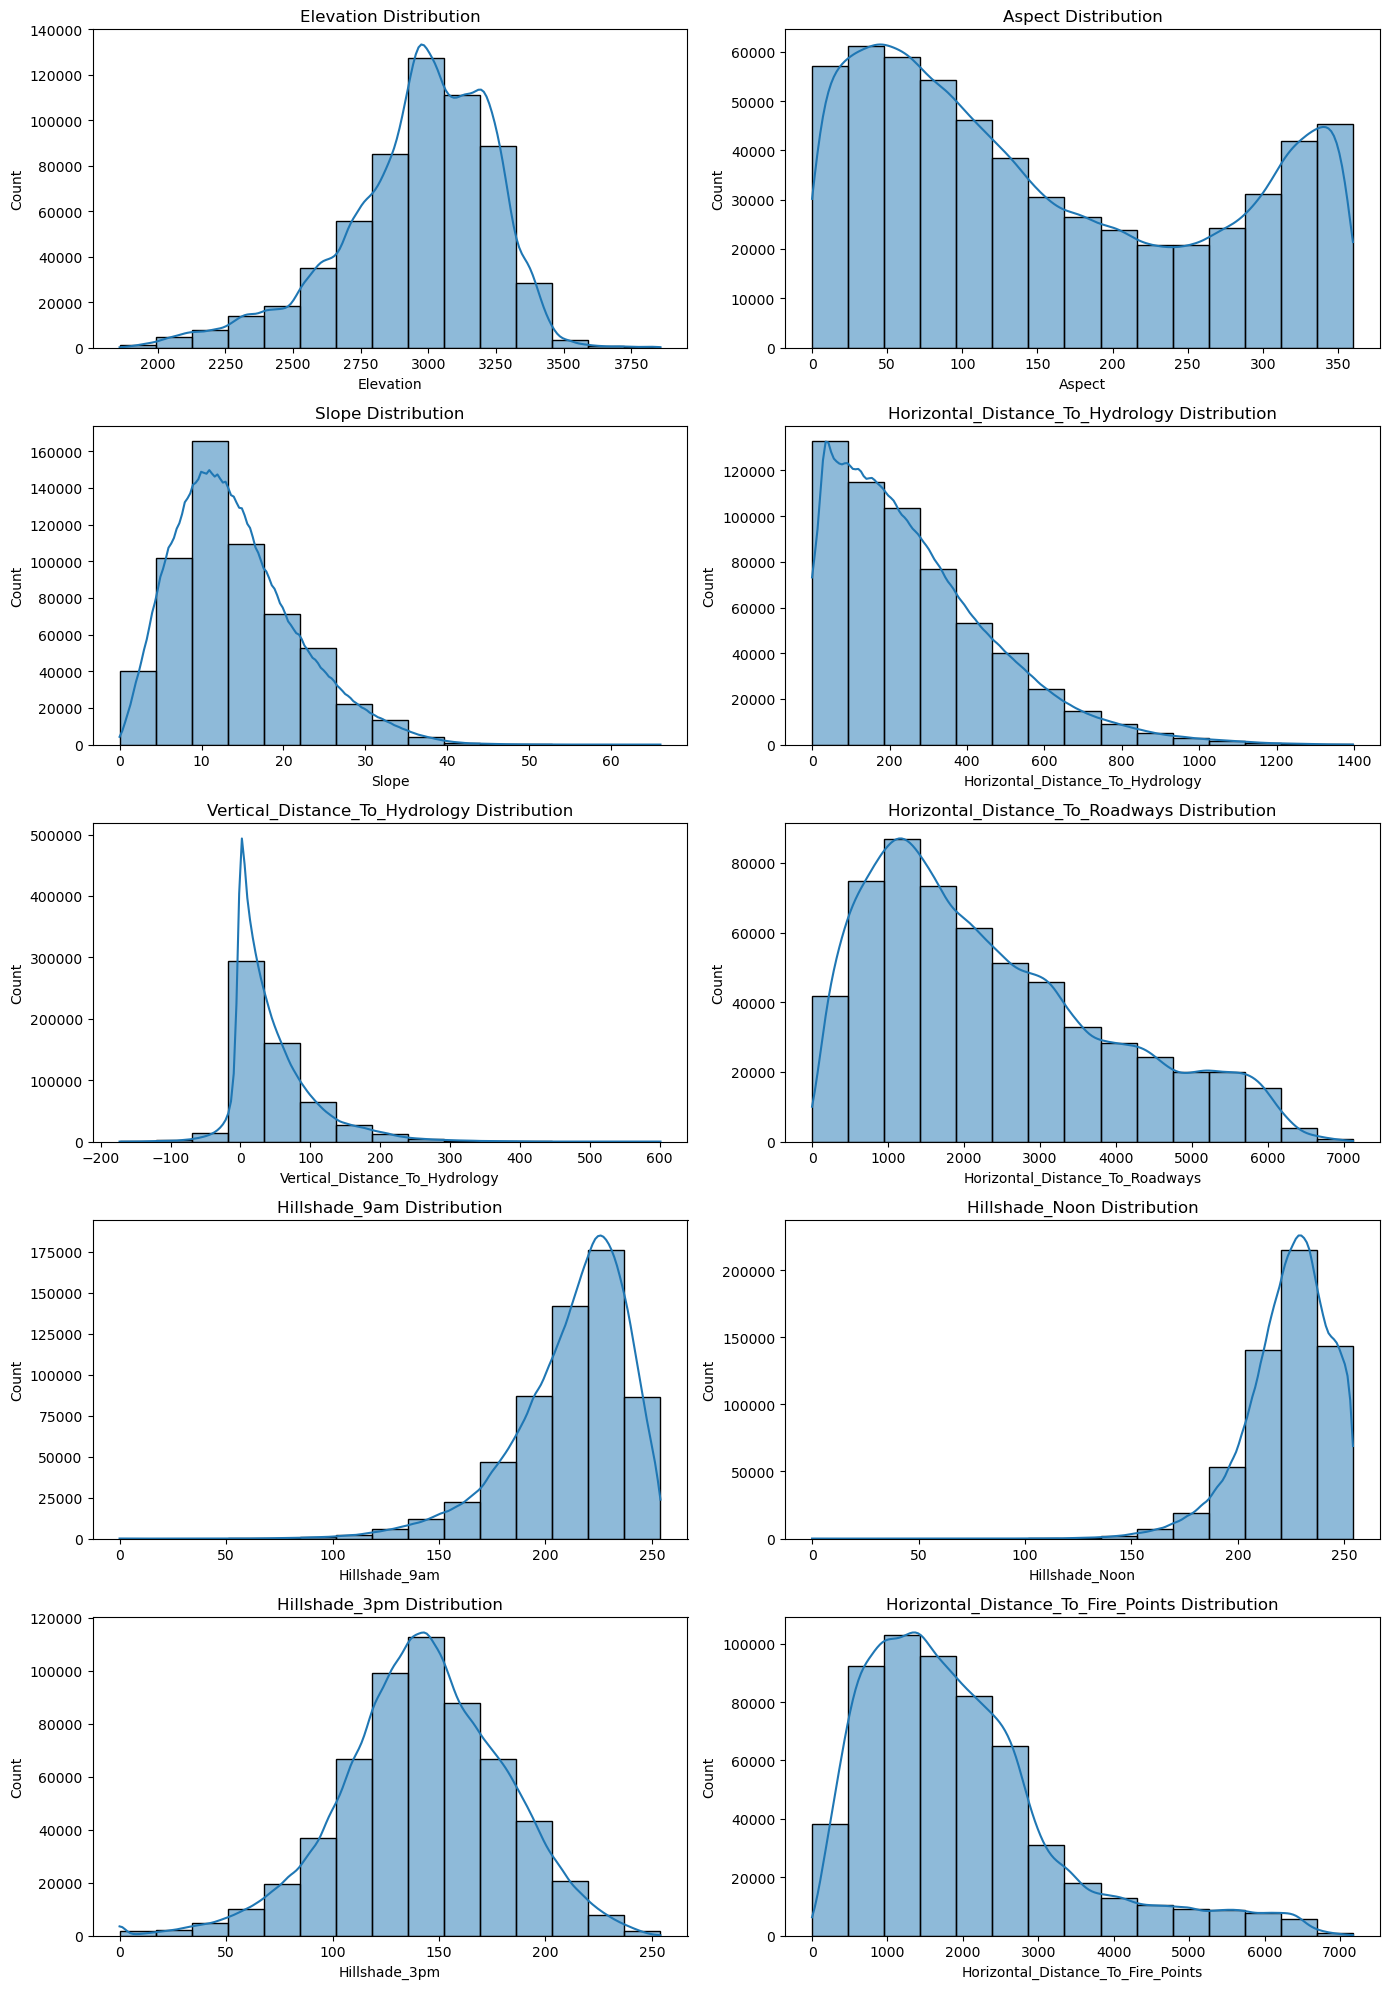

In [10]:
columns= [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

num_plots=len(columns)
num_cols=2
num_row = math.ceil(num_plots / num_cols)
fig,axes=plt.subplots(num_row,num_cols,figsize=(14,num_row*4))

axes=axes.flatten()
for i , col in enumerate(columns):
    sns.histplot(data[col],kde=True,bins=15,edgecolor="k",ax=axes[i])
    axes[i].set_title(f"{col} Distribution")


for j in range (i+1,len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

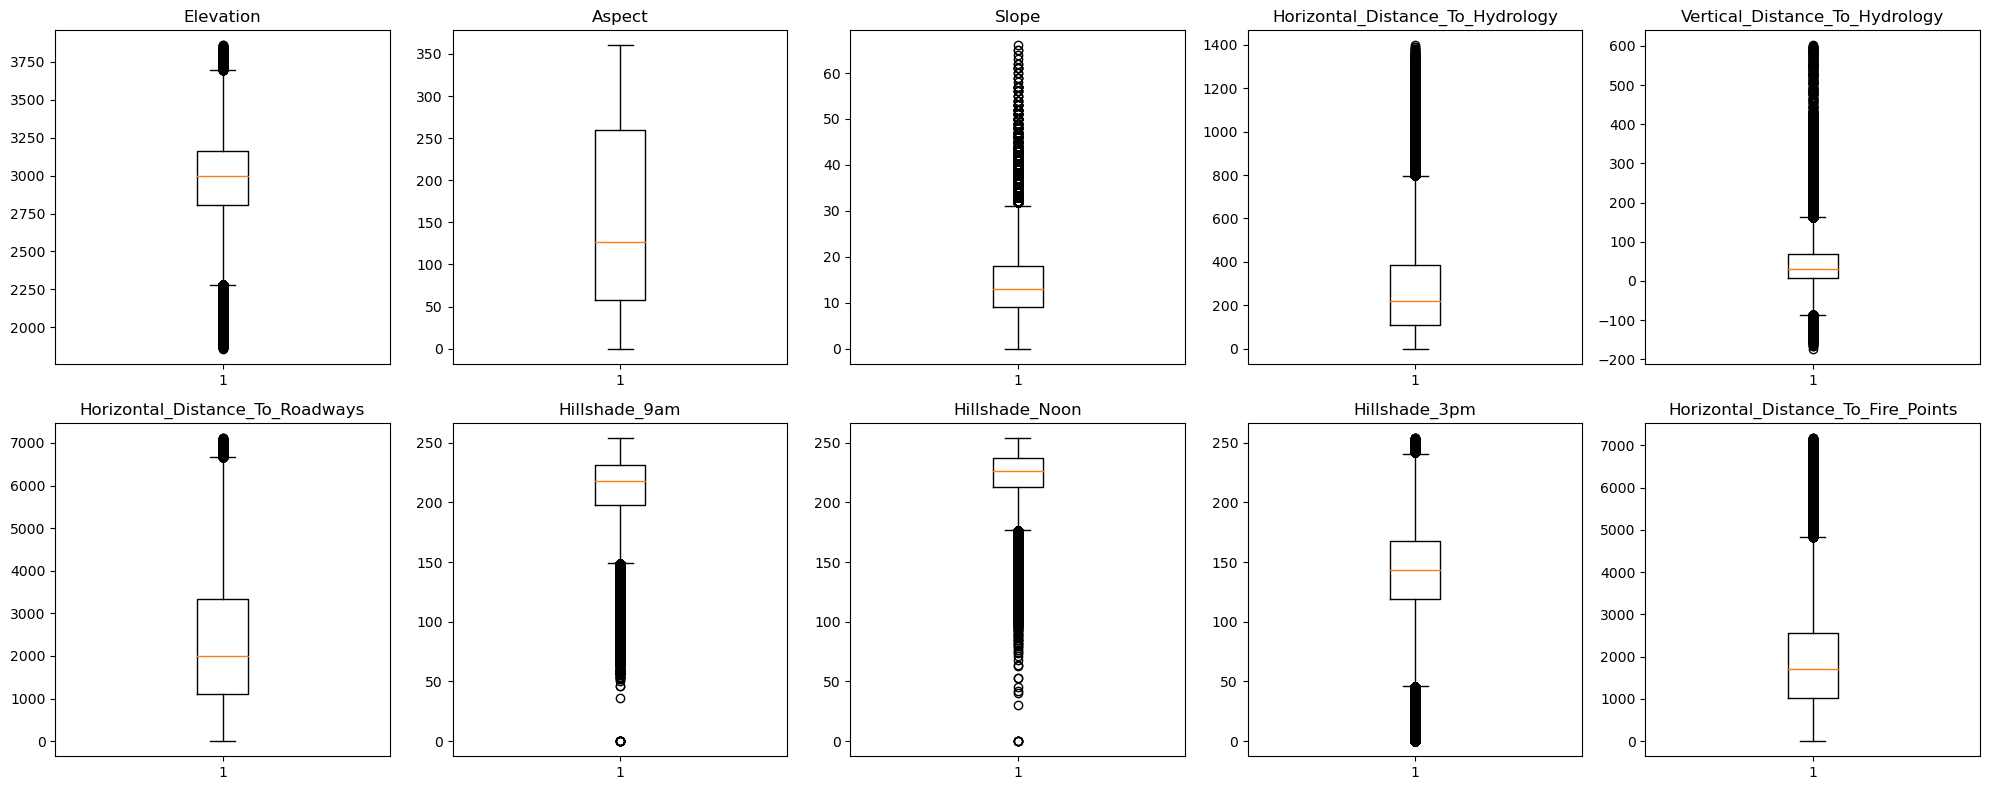

In [11]:
num_cols=columns
num_plots=len(num_cols)
num_cols_per_row=5
num_rows=math.ceil(num_plots/num_cols_per_row)

plt.figure(figsize=(num_cols_per_row*4,num_rows*4))

for i , col in enumerate(num_cols):
    plt.subplot(num_rows,num_cols_per_row,i+1)
    plt.boxplot(data[col])
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

we Can See Many Outliers in data 

### Remove Outliers

In [12]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR
    lowOutlier = data[data[col] < LO_FENNCE][col].values
    upOutlier = data[data[col] > UP_FENNCE][col].values
    data[col].replace(lowOutlier, LO_FENNCE, inplace=True)
    data[col].replace(upOutlier, UP_FENNCE, inplace=True)

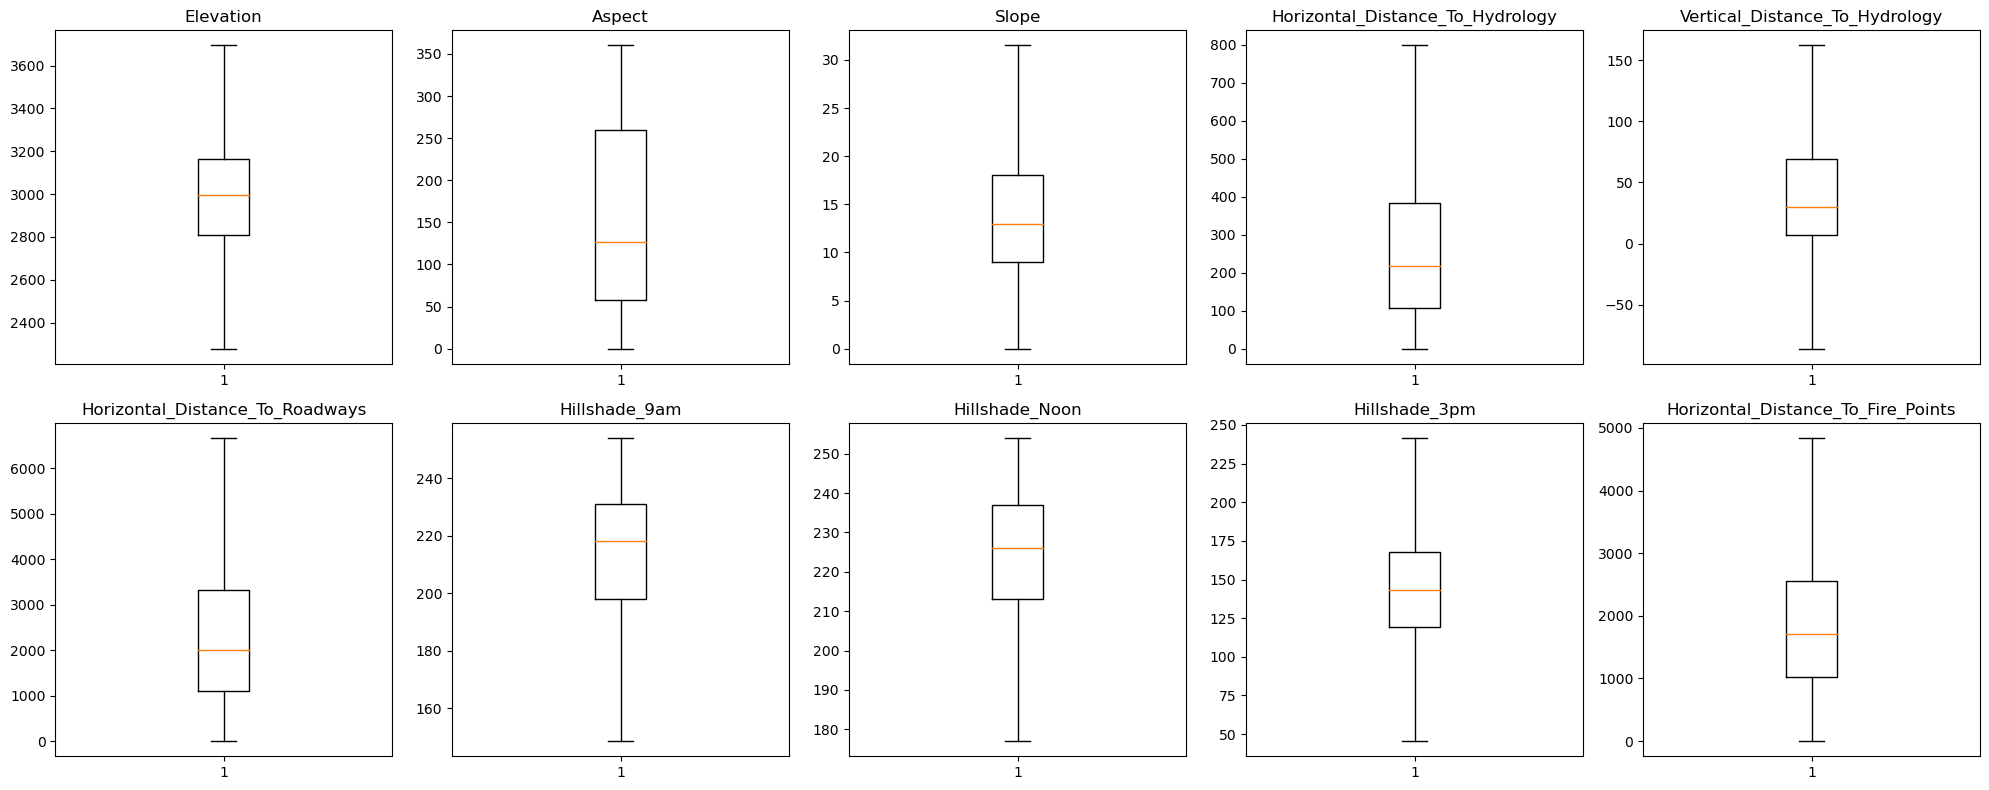

In [13]:
num_cols=columns
num_plots=len(num_cols)
num_cols_per_row=5
num_rows=math.ceil(num_plots/num_cols_per_row)

plt.figure(figsize=(num_cols_per_row*4,num_rows*4))

for i , col in enumerate(num_cols):
    plt.subplot(num_rows,num_cols_per_row,i+1)
    plt.boxplot(data[col])
    plt.title(f"{col}")

plt.tight_layout()
plt.show()

# Build Model

In [14]:
x=data.drop(["Cover_Type"],axis=1)
y=data["Cover_Type"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [15]:
model_1=tree.DecisionTreeClassifier(max_depth=5,random_state=24)
model_1=model_1.fit(x_train,y_train)

In [16]:
y_pred_1=model_1.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1))
print("\nClassification Report:\n", classification_report(y_test, y_pred_1))

Confusion Matrix:
 [[29250 12074    18     0     6     5  1065]
 [12076 43503   892     1    75    13   145]
 [    0   881  6089    90     8    31     0]
 [    0    23   334   204     0     0     0]
 [    0  1705    83     0   104     0     0]
 [    0   964  2367    35     4   118     0]
 [ 1805    20     0     0     0     0  2215]]

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.69      0.68     42418
           2       0.74      0.77      0.75     56705
           3       0.62      0.86      0.72      7099
           4       0.62      0.36      0.46       561
           5       0.53      0.05      0.10      1892
           6       0.71      0.03      0.06      3488
           7       0.65      0.55      0.59      4040

    accuracy                           0.70    116203
   macro avg       0.65      0.47      0.48    116203
weighted avg       0.70      0.70      0.69    116203



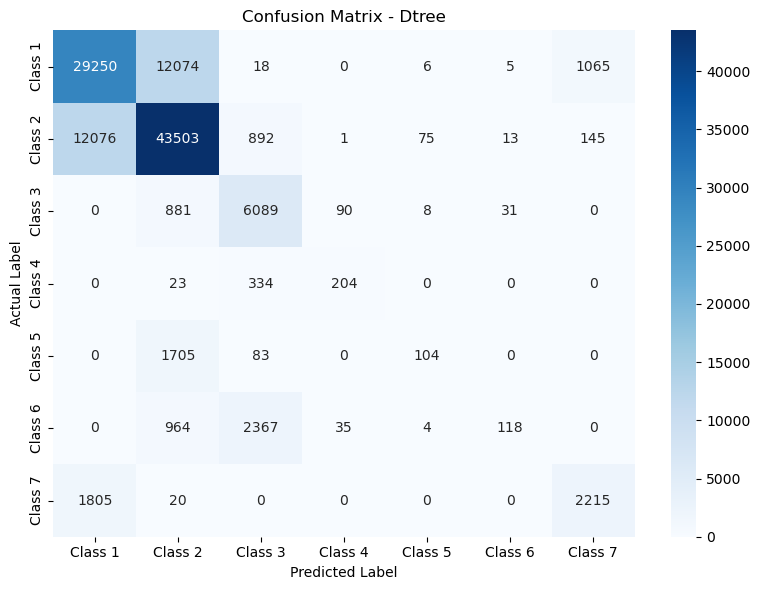

In [17]:
cm = confusion_matrix(y_test, y_pred_1)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

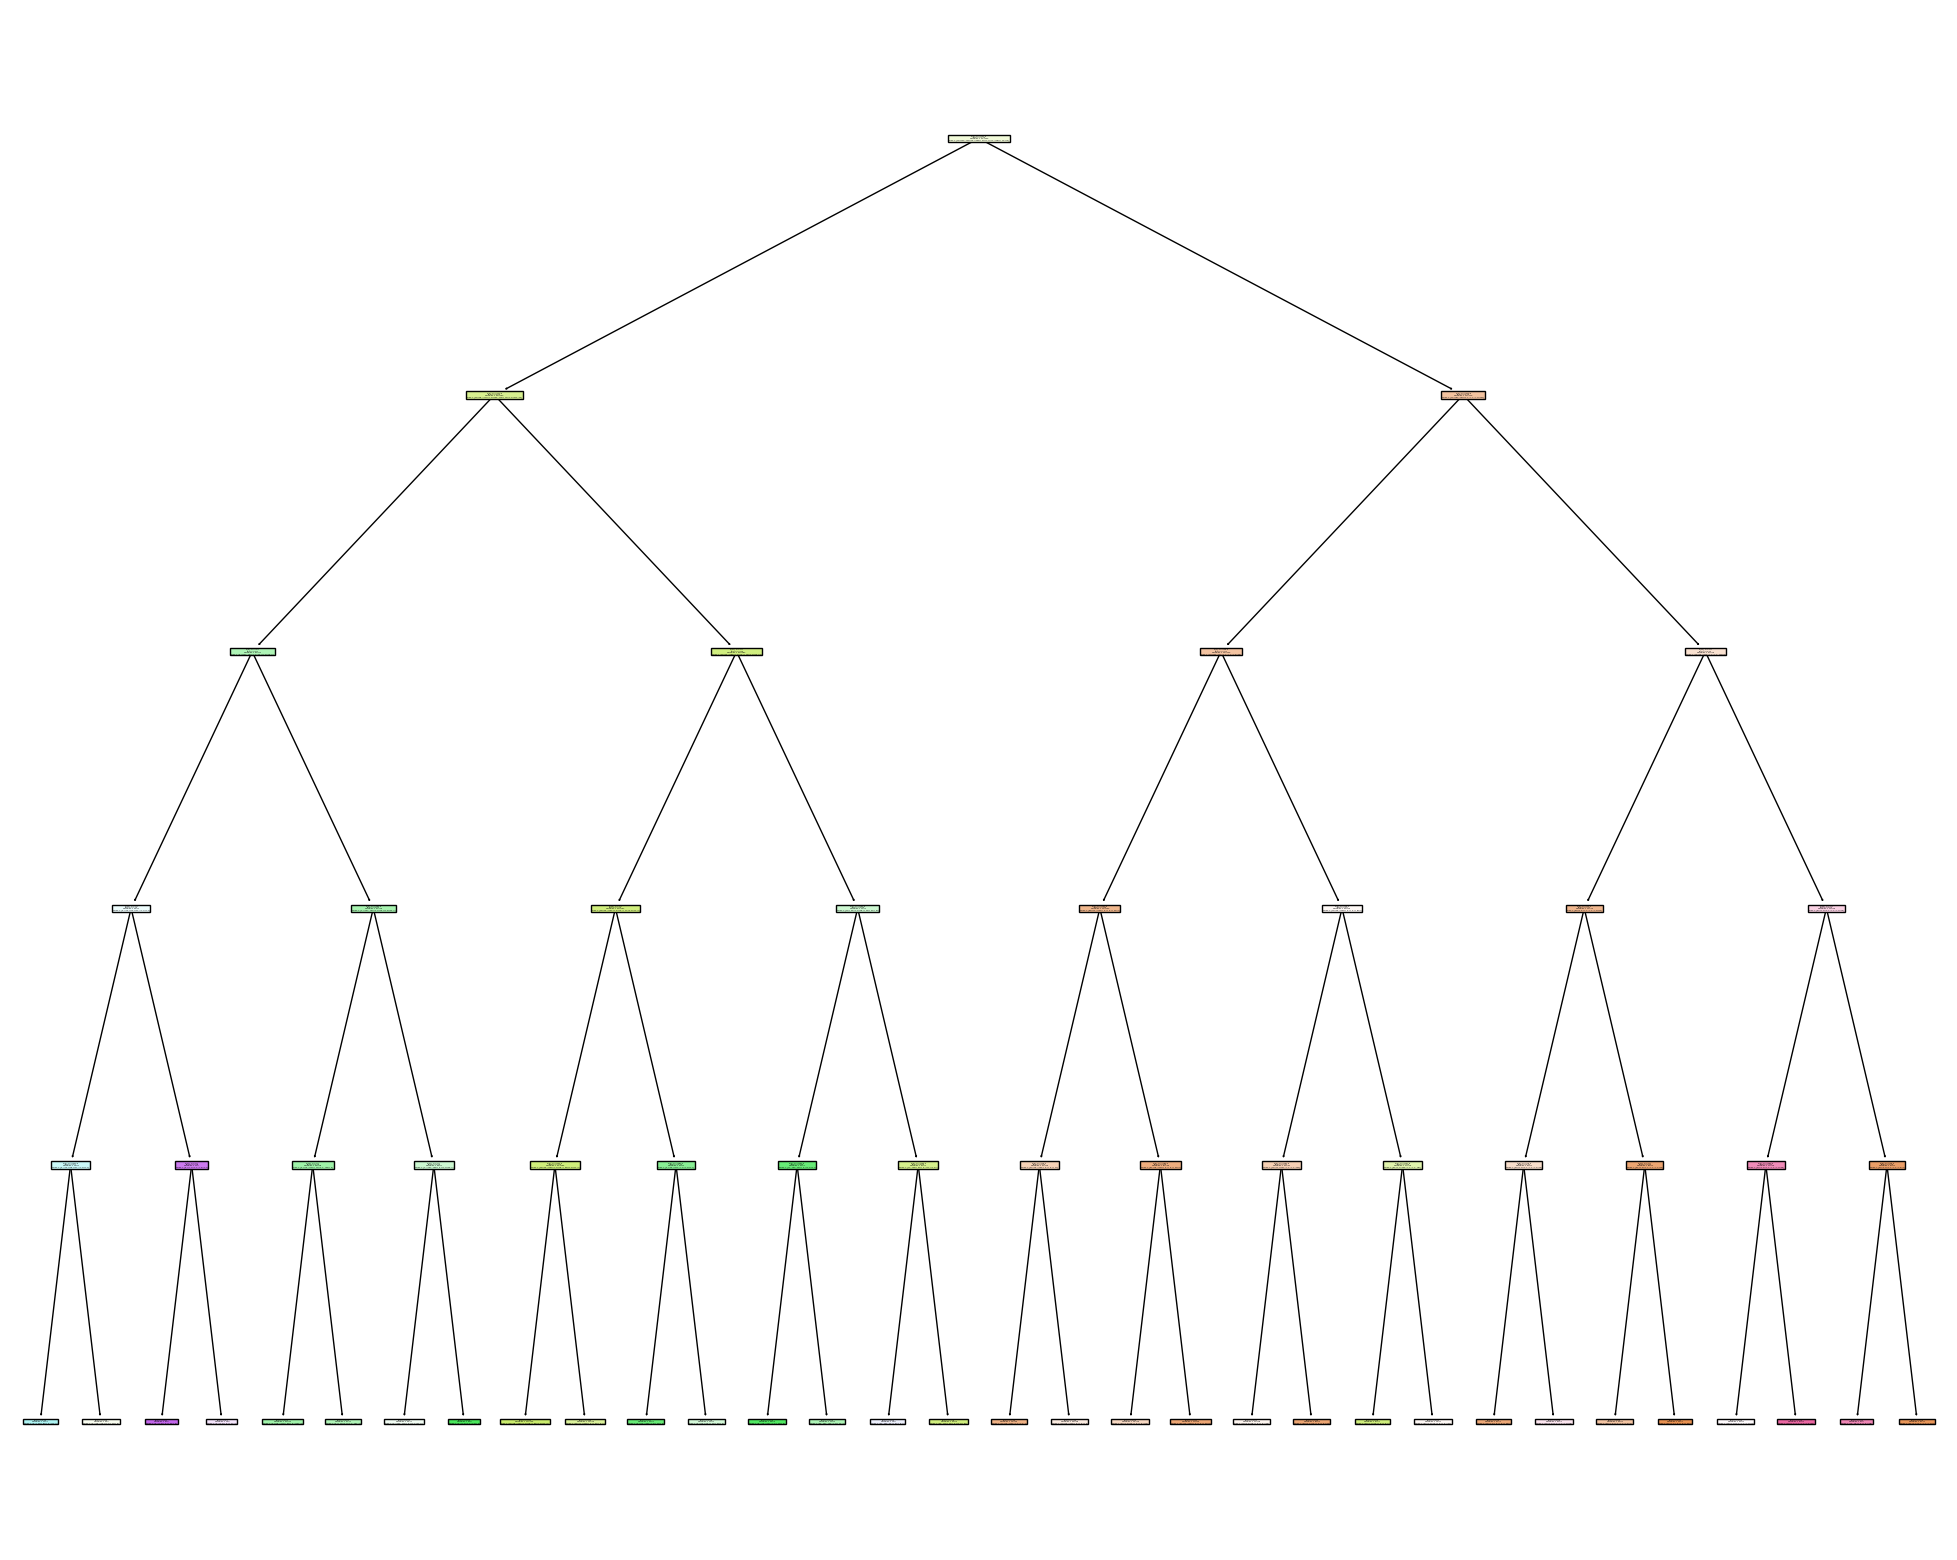

In [18]:
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model_1, filled=True)

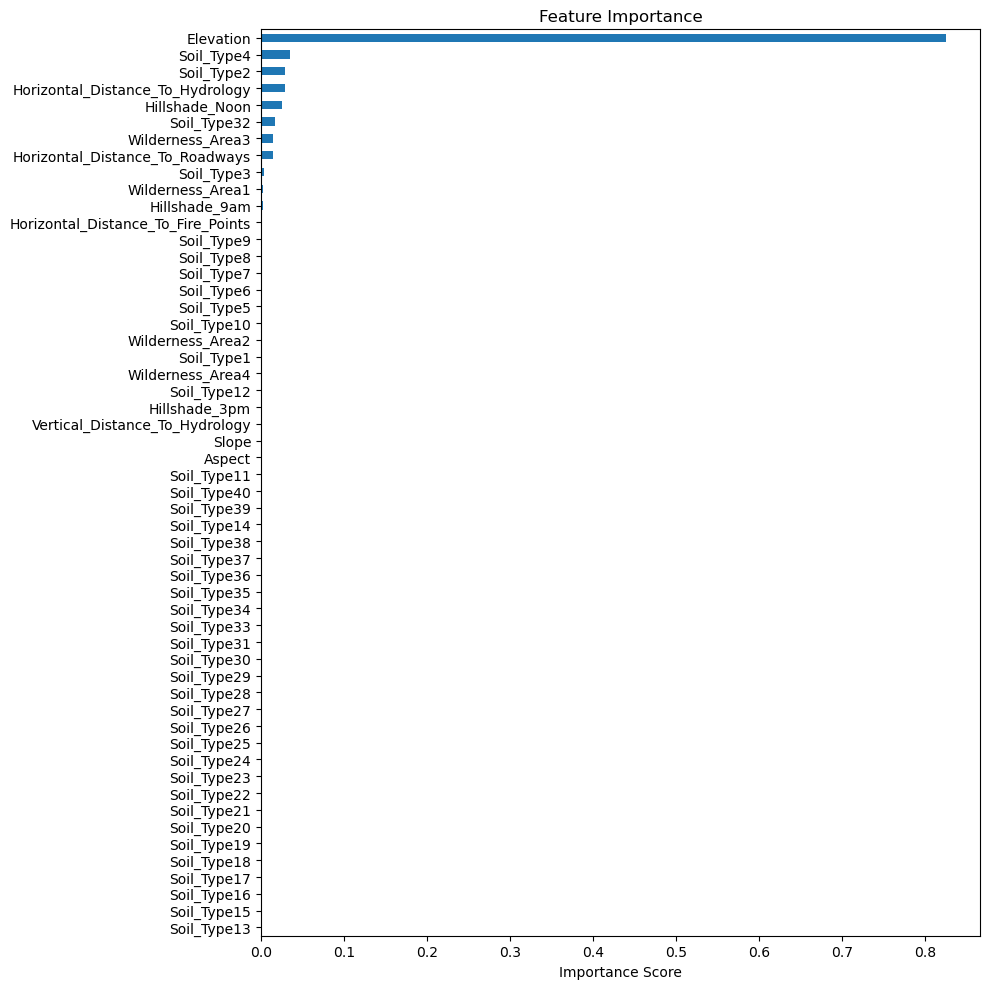

In [19]:
#feature importance scale
dtree_importance = pd.Series(model_1.feature_importances_, index=x.columns)
dtree_importance.sort_values().plot(kind='barh', title='Feature Importance', figsize=(10, 10))
plt.xlabel("Importance Score")
plt.tight_layout()

# Bonus:Apply Logistic Regression

In [20]:
model_2=LogisticRegression(max_iter=350)
model_2.fit(x_train,y_train)

LogisticRegression(max_iter=350)

In [21]:
y_pred_2=model_2.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_2))

Confusion Matrix:
 [[28188 14109    27     0     0     3    91]
 [11315 43978  1337     0     0    69     6]
 [    2  2505  4442     0     0   150     0]
 [    0    32   525     0     0     4     0]
 [   37  1801    54     0     0     0     0]
 [    8  1957  1474     0     0    49     0]
 [ 3778   228     0     0     0     0    34]]

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.66      0.66     42418
           2       0.68      0.78      0.73     56705
           3       0.57      0.63      0.59      7099
           4       0.00      0.00      0.00       561
           5       0.00      0.00      0.00      1892
           6       0.18      0.01      0.03      3488
           7       0.26      0.01      0.02      4040

    accuracy                           0.66    116203
   macro avg       0.33      0.30      0.29    116203
weighted avg       0.62      0.66      0.63    116203



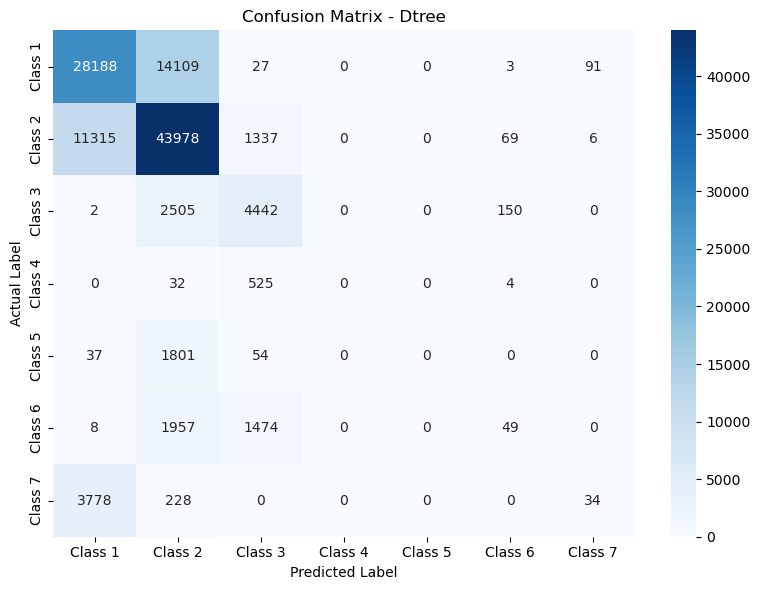

In [22]:
cm_lr = confusion_matrix(y_test, y_pred_2)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

## Bonus:Hyperparameters Tunning

In [23]:
data=tree.DecisionTreeClassifier(random_state=26)

In [24]:
params = {
    'max_depth': [None, 10, 20],          
    'min_samples_leaf': [1, 5],           
    'min_samples_split': [2, 10],          
    'criterion': ["gini", "entropy"],      
    'max_features': ['sqrt', None],        
    'class_weight': [None, 'balanced']     
}


In [25]:
grid=GridSearchCV(estimator=data,param_grid=params,
                  cv=4,n_jobs=1,verbose=1,scoring="accuracy" )

In [26]:
grid.fit(x_train,y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=26), n_jobs=1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10]},
             scoring='accuracy', verbose=1)

In [27]:
score=pd.DataFrame(grid.cv_results_)
data_best=grid.best_estimator_

In [28]:
print(data_best)

DecisionTreeClassifier(criterion='entropy', random_state=26)


In [29]:
pred=data_best.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[39885  2338     2     0    31     5   157]
 [ 2310 53858   143     0   251   115    28]
 [    3   157  6611    54    25   249     0]
 [    0     2    71   458     0    30     0]
 [   36   222    16     0  1607    11     0]
 [    5   113   271    23     8  3068     0]
 [  180    21     0     0     2     0  3837]]

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42418
           2       0.95      0.95      0.95     56705
           3       0.93      0.93      0.93      7099
           4       0.86      0.82      0.84       561
           5       0.84      0.85      0.84      1892
           6       0.88      0.88      0.88      3488
           7       0.95      0.95      0.95      4040

    accuracy                           0.94    116203
   macro avg       0.91      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



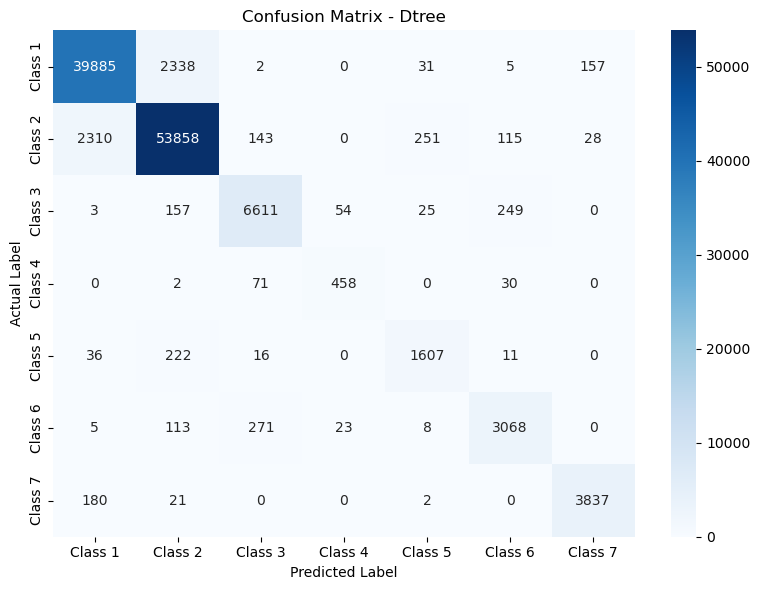

In [30]:
cm_best_dt = confusion_matrix(y_test, pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

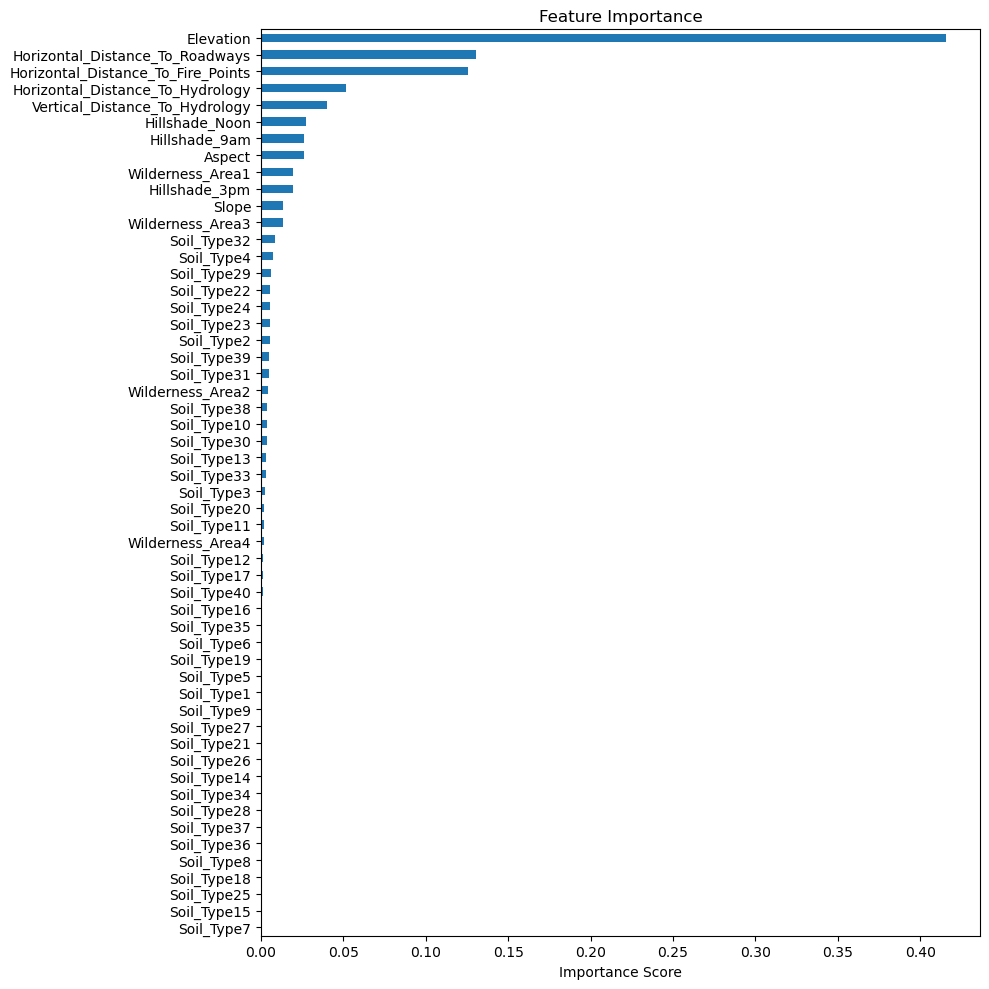

In [31]:
data_best_importance = pd.Series(data_best.feature_importances_, index=x.columns)
data_best_importance.sort_values().plot(kind='barh', title='Feature Importance', figsize=(10, 10))
plt.xlabel("Importance Score")
plt.tight_layout()